<a href="https://colab.research.google.com/github/nataliatasso/WMC_notebooks/blob/main/%5BNOTEBOOK_8%5D_Hypothesis_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística - Teste de Hipóteses

## Considerando a base de dados experimento_test_ab.csv responda as questões abaixo.

In [ ]:
# Bibliotecas base
import pandas as pd
import numpy as np

# Bibliotecas para estatística
from scipy.stats import ttest_ind, chi2_contingency, norm, kstest
from scipy import stats

# Bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Carregar os dados
df_teste_ab = pd.read_csv('experimento_teste_ab.csv', index_col=0)

# Verificar as primeiras linhas do dataset
df_teste_ab.head()

,Versão_Página,Visualizações,Conversões
Visitante_ID,,,
1,A,167,1
2,A,160,0
3,A,170,0
4,A,161,1
5,A,104,0


In [ ]:
df_teste_ab['Versão_Página'].unique()

array(['A', 'B'], dtype=object)

1. Qual dos cenários têm a maior taxa de conversão?

In [ ]:
# Agrupar por 'Versão_Página' e calcular a soma de visualizações e conversões para cada grupo
resultados = df_teste_ab.groupby('Versão_Página').agg(
    total_visualizacoes=('Visualizações', 'sum'),
    total_conversoes=('Conversões', 'sum')
)

# Calcular a taxa de conversão para cada versão (conversões / visualizações)
resultados['taxa_conversao'] = resultados['total_conversoes'] / resultados['total_visualizacoes']

# Exibir os resultados
print(resultados[['taxa_conversao']])

# Identificar o cenário com a maior taxa de conversão
versao_maior_conversao = resultados['taxa_conversao'].idxmax()

# Exibir o cenário com a maior taxa de conversão
print(f"O cenário com a maior taxa de conversão é o {versao_maior_conversao}")

               taxa_conversao
Versão_Página                
A                    0.000696
B                    0.000830
O cenário com a maior taxa de conversão é o B


2. Calcule qual o tamanho da amostra necessária para o desenvolvimento de um teste A/B, seguindo os seguintes critérios:


a. O cenário A, da base, como o inicial, que funciona hoje.


b. Considere 95% de confiança de que o efeito na conversão não foi aleatório com um nível de significância de 5% (alpha = 0,05).


c. Também considere 80% de certeza conseguir capturar o efeito da nova abordagem.


d. O aumento para 10% de conversão.

In [ ]:
from scipy.stats import norm

# from statsmodels.stats.proportion
# import proportion_effectsize

# Filtrar os dados da versão A (cenário atual)
df_versao_a = df_teste_ab[df_teste_ab['Versão_Página'] == 'A']

# Calcular a taxa de conversão atual (proporção de conversões)
taxa_conversao_atual = df_versao_a['Conversões'].mean()

# Calcular a variância da conversão atual
variancia_conversao_atual = df_versao_a['Conversões'].var()

# Definir os parâmetros para o cálculo do tamanho da amostra
alpha = 0.05  # Nível de significância
power = 0.80  # Poder estatístico (1 - beta)
sigma = np.sqrt(variancia_conversao_atual)  # Desvio padrão da conversão atual

# Calcular os valores de Z para o nível de significância e poder
z_alpha_half = norm.ppf(1 - alpha / 2)  # Z para α/2
z_beta = norm.ppf(power)  # Z para β

# Aumento esperado de 10% na conversão
delta = (taxa_conversao_atual * 1.10) - taxa_conversao_atual  # Δ

# Calcular o tamanho da amostra usando a fórmula
n = ((z_alpha_half + z_beta)**2 * sigma**2) / (delta**2)

# Calcular o tamanho da amostra para o teste A/B
sample_size_ab = n * 2  # A amostra total é o dobro para dois grupos

# 7. Exibir os resultados formatados
print(f'Amostra necessária para um grupo: {n:.2f}')
print(f'Amostra necessária para o teste A/B: {sample_size_ab:.2f}')

Amostra necessária para um grupo: 6696.93
Amostra necessária para o teste A/B: 13393.87


## Verifique a base pacientes.csv, os dados são fictícios. A tabela sintetiza uma base de dados de um hospital que trata de pacientes com problemas cardíacos. Considere a base como a população, portanto as estatísticas da população são conhecidas. Responda as perguntas abaixo.

In [ ]:
# Carregar os dados
df_pacientes = pd.read_csv('pacientes.csv', index_col=0)

# Verificar as primeiras linhas do dataset
df_pacientes.head()

,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


In [ ]:
df_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pressao_Arterial   1000 non-null   float64
 1   Idade              1000 non-null   int64  
 2   Genero             1000 non-null   int64  
 3   Etnia              1000 non-null   int64  
 4   Estado_Saude       1000 non-null   int64  
 5   Nome_Genero        1000 non-null   object 
 6   Nome_Etnia         1000 non-null   object 
 7   Nome_Estado_Saude  1000 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 70.3+ KB


3. Considerando uma amostra de 45 números que representam o index do dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]). Considerando essa amostra é possível dizer que a idade média das pessoas com problemas cardíacos é maior que 50 anos? Nível de significância igual a 5%.

H0: a média de idade de pessoas com problemas cardíacos é igual a 50 anos.

H1: a média de idade de pessoas com problemas de saúde é diferente de 50 anos.

Predição: a média de idade de pessoas com problemas de saúde é maior do que 50 anos.

In [ ]:
# Sub-amostra dos índices fornecidos
indices = [909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756,
           358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348,
           146, 505, 273, 957, 362]

# Filtrar a sub-amostra no dataframe
df_sub_amostra = df_pacientes.loc[indices]

# Calcular a idade média para todas as observações da sub-amostra
idade_media = df_sub_amostra['Idade'].mean()

# Teste t de uma amostra
t_stat, p_valor = stats.ttest_1samp(df_sub_amostra['Idade'], 50)

# Resultados
print(f"Idade média: {idade_media}")
print(f"T-Stat: {t_stat}")
print(f"P-Valor Bilateral: {p_valor}")

# Verificar se p-valor é menor ou igual a 0.05
if p_valor <= 0.05:
    print("Rejeitamos a hipótese nula. A idade média é significativamente diferente de 50 anos.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que a idade média é diferente de 50 anos.")

Idade média: 50.08888888888889
T-Stat: 0.052280983519350496
P-Valor Bilateral: 0.9585414467632783
Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que a idade média é diferente de 50 anos.


4. Queremos entender que tipo de amostra estamos lidando se dividirmos os conjuntos em 2, sendo um com pessoas que têm condições de saúde adicionais e o outro com pessoas saudáveis. Seria dependente ou independente?

Para dividirmos nossa amostra em dois grupos com base nas condições de saúde poderíamos utilizar as informações presentes na variável 'Nome_Estado_Saude' (assim como 'Estado_Saude'). Trata-se de uma variável categórica com duas categorias: 'pessoas saudáveis' e 'pessoas com condições adicionais'. Assim, vemos que as pessoas que participam de uma condição não podem participar da outra condição e vice-versa, portanto, trata-se de **grupos independentes**. Quando essa condição ocorre, dizemos que o delineamento da pesquisa é entre participantes.

5. Agora considere o um conjunto de pessoas aleatória que representam o index do dataframe, índices = ([690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372]), podemos dizer que a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde? Considere o nível de significância a 6%.

H0: a pressão arterial média de pacientes com condições de saúde adicionais é igual da pressão arterial média de pacientes sem condições adicionais.

H1: a pressão arterial média de pacientes com condições de saúde adicionais é diferente da pressão arterial média de pacientes sem condições adicionais.

In [ ]:
# Sub-amostra dos índices fornecidos
indices = [690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607,
           811, 346, 354, 966, 943, 372]

# Filtrar a sub-amostra no dataframe
df_sub_amostra = df_pacientes.loc[indices]

# Separar os pacientes com e sem condições de saúde adicionais
df_com_condicoes = df_sub_amostra[df_sub_amostra['Nome_Estado_Saude'] == 'Com condições de saúde adicionais']
df_sem_condicoes = df_sub_amostra[df_sub_amostra['Nome_Estado_Saude'] == 'Saudável']

# Pressão arterial média dos dois grupos
media_com_condicoes = df_com_condicoes['Pressao_Arterial'].mean()
media_sem_condicoes = df_sem_condicoes['Pressao_Arterial'].mean()

# Teste t de duas amostras independentes
t_stat, p_valor = stats.ttest_ind(df_com_condicoes['Pressao_Arterial'], df_sem_condicoes['Pressao_Arterial'])

# Resultados
print(f"Pressão arterial média (com condições de saúde): {media_com_condicoes}")
print(f"Pressão arterial média (sem condições de saúde): {media_sem_condicoes}")
print(f"T-Stat: {t_stat}")
print(f"P-Valor Bilateral: {p_valor}")

# Verificar se p-valor é menor que 0.06
if p_valor < 0.06:
    print("Rejeitamos a hipótese nula. A pressão arterial média é significativamente diferente entre os dois grupos.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que a pressão arterial média é diferente entre os dois grupos.")

Pressão arterial média (com condições de saúde): 153.19725449805927
Pressão arterial média (sem condições de saúde): 152.94305165531088
T-Stat: 0.08124024162329026
P-Valor Bilateral: 0.9359246016248415
Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que a pressão arterial média é diferente entre os dois grupos.


6. Existe uma diferença significativa na pressão arterial média entre diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%)


a. Hipótese Nula (H0): A pressão arterial média é a mesma em todos os grupos étnicos.

b. Hipótese Alternativa (H1): Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.






In [ ]:
# Teste ANOVA
# Agrupar os dados por etnia
grupos_etnicos = [df_pacientes[df_pacientes['Nome_Etnia'] == etnia]['Pressao_Arterial'] for etnia in df_pacientes['Nome_Etnia'].unique()]

# Realizar o teste ANOVA
f_stat, p_valor_anova = stats.f_oneway(*grupos_etnicos)

# Resultados do teste ANOVA
print(f"F-Stat (ANOVA): {f_stat}")
print(f"P-Valor (ANOVA): {p_valor_anova}")

# Verificar se p-valor é menor que 0.05
if p_valor_anova < 0.05:
    print("Rejeitamos a hipótese nula. Há uma diferença significativa na pressão arterial média entre os grupos étnicos.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que há uma diferença significativa na pressão arterial média entre os grupos étnicos.")

F-Stat (ANOVA): 0.23245296261596837
P-Valor (ANOVA): 0.873800123850745
Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que há uma diferença significativa na pressão arterial média entre os grupos étnicos.


c. Existe uma associação entre a idade dos pacientes e sua pressão arterial?


1.   Hipótese Nula (H0): A idade dos pacientes é independente da pressão arterial.
2.   Hipótese Alternativa (H1): A idade dos pacientes está associada à sua pressão arterial.

Coeficiente de correlação: -0.021385356934648977
P-Valor (Correlação): 0.4993608212055476
Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que idade está associada à pressão arterial.


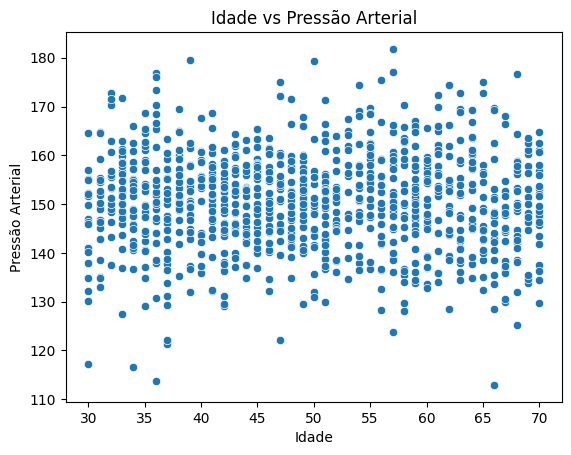

In [ ]:
# Teste de correlação
# Verificar a correlação entre idade e pressão arterial
coef_corr, p_valor_corr = stats.pearsonr(df_pacientes['Idade'], df_pacientes['Pressao_Arterial'])

# Resultados do teste de correlação
print(f"Coeficiente de correlação: {coef_corr}")
print(f"P-Valor (Correlação): {p_valor_corr}")

# Verificar se p-valor é menor que 0.05
if p_valor_corr < 0.05:
    print("Rejeitamos a hipótese nula. Existe uma associação significativa entre idade e pressão arterial.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que idade está associada à pressão arterial.")

# Visualização da relação entre idade e pressão arterial
sns.scatterplot(x='Idade', y='Pressao_Arterial', data=df_pacientes)
plt.title('Idade vs Pressão Arterial')
plt.xlabel('Idade')
plt.ylabel('Pressão Arterial')
plt.show()

7. Lúcia é uma pesquisadora e tem o objetivo de entender a relação de gênero neste grupo de pacientes. Acredita-se que há uma relação entre o sexo e condições de saúde adicionais. (Teste qui-quadrado)

In [ ]:
from scipy.stats import chi2_contingency

# Criar uma tabela de contingência entre o sexo e condições de saúde adicionais
tabela_contingencia = pd.crosstab(df_pacientes['Genero'], df_pacientes['Nome_Estado_Saude'])

# Realizar o teste qui-quadrado
chi2, p_value, dof, expected = chi2_contingency(tabela_contingencia)

# Exibir os resultados
print(f"Qui-quadrado: {chi2}")
print(f"Valor p: {p_value}")
print(f"Graus de liberdade: {dof}")
print("Frequências esperadas:")
print(expected)

# Verificar o resultado com nível de significância de 5% (alpha <= 0.05)
alpha <= 0.05
if p_value <= alpha:
    print("Rejeitamos a hipótese nula: Existe uma associação significativa entre o sexo e as condições de saúde adicionais.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que há uma associação entre o sexo e as condições de saúde adicionais.")

Qui-quadrado: 0.0
Valor p: 1.0
Graus de liberdade: 1
Frequências esperadas:
[[253.47 243.53]
 [256.53 246.47]]
Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que há uma associação entre o sexo e as condições de saúde adicionais.


8. Qual é o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais? (nível de confiança 95%).



In [ ]:
# Filtrar os pacientes com condições de saúde adicionais
df_com_condicoes = df_pacientes[df_pacientes['Nome_Estado_Saude'] == 'Com condições de saúde adicionais']

# Calcular média, desvio padrão e tamanho da amostra
media = df_com_condicoes['Pressao_Arterial'].mean()
desvio_padrao = df_com_condicoes['Pressao_Arterial'].std()
n = len(df_com_condicoes)

# Nível de confiança de 95%
nivel_confianca = 0.95
alpha = 1 - nivel_confianca

# Valor crítico t
t_critico = stats.t.ppf(1 - alpha/2, df=n-1)

# Margem de erro
margem_erro = t_critico * (desvio_padrao / np.sqrt(n))

# Intervalo de confiança
limite_inferior = media - margem_erro
limite_superior = media + margem_erro

# Exibir os resultados
print(f"Média da pressão arterial: {media}")
print(f"Intervalo de confiança a 95%: ({limite_inferior}, {limite_superior})")

Média da pressão arterial: 150.11845194515755
Intervalo de confiança a 95%: (149.21972443653837, 151.01717945377672)


9. A distribuição da pressão arterial na população segue uma distribuição normal?


a. Hipótese Nula (H0): A distribuição da pressão arterial na população segue uma distribuição normal.


b. Hipótese Alternativa (H1): A distribuição da pressão arterial na população não segue uma distribuição normal.

In [ ]:
# Realizar o teste de Kolmogorov-Smirnov (KS) na pressão arterial
stat, p_value = kstest(df_pacientes['Pressao_Arterial'], 'norm', args=(df_pacientes['Pressao_Arterial'].mean(), df_pacientes['Pressao_Arterial'].std()))

# Exibir os resultados do teste
print(f"Estatística de KS: {stat}")
print(f"Valor p: {p_value}")

# Verificar o resultado com nível de significância de 5% (alpha = 0.05)
alpha = 0.05
if p_value > alpha:
    print("Não rejeitamos a hipótese nula: a distribuição da pressão arterial segue uma distribuição normal.")
else:
    print("Rejeitamos a hipótese nula: a distribuição da pressão arterial não segue uma distribuição normal.")

Estatística de KS: 0.020519631883174544
Valor p: 0.7856894546948101
Não rejeitamos a hipótese nula: a distribuição da pressão arterial segue uma distribuição normal.


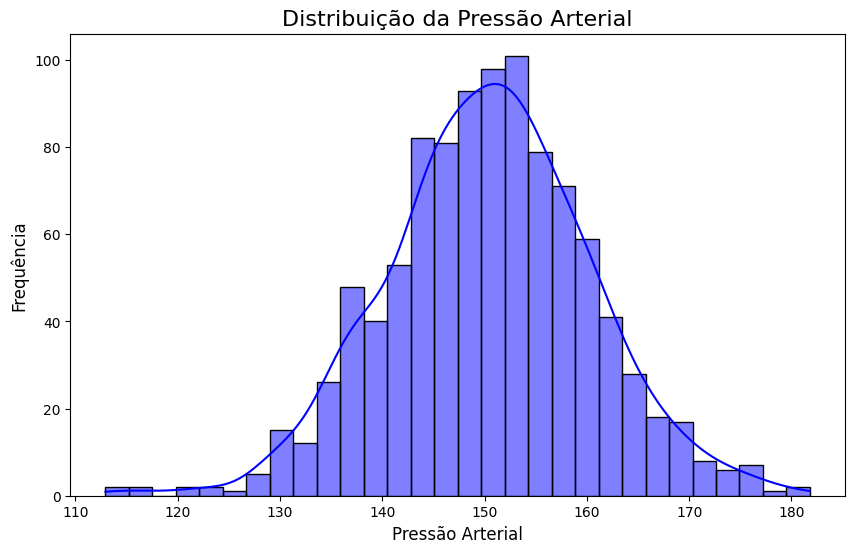

In [ ]:
# Criar o gráfico de distribuição (histograma + curva de densidade)
plt.figure(figsize=(10, 6))
sns.histplot(df_pacientes['Pressao_Arterial'], kde=True, bins=30, color='blue')

# Configurar o título e rótulos
plt.title('Distribuição da Pressão Arterial', fontsize=16)
plt.xlabel('Pressão Arterial', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Exibir o gráfico
plt.show()